<a href="https://colab.research.google.com/github/rishabhnam002/CodSoft/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv("/content/train_data.txt", sep=':::', names=['ID', 'TIITLE', 'GENRE', 'DESCRPTION'])

<ipython-input-18-59342dceb9ba>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("/content/train_data.txt", sep=':::', names=['ID', 'TIITLE', 'GENRE', 'DESCRPTION'])


In [19]:
display(df)

,ID,TIITLE,GENRE,DESCRPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [20]:
display(df.head())

,ID,TIITLE,GENRE,DESCRPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [21]:
print(df.shape)

(54214, 4)


In [24]:
df1 = pd.read_csv("/content/test_data.txt", sep=':::', names=['ID', 'TITTLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-24-612bfa4c3bd4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("/content/test_data.txt", sep=':::', names=['ID', 'TITTLE', 'GENRE', 'DESCRIPTION'])


In [27]:

display(df1.head())
print(df1.shape)

,ID,TITTLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


In [28]:
df2 = pd.read_csv("/content/test_data_solution.txt", sep=':::', names=['ID', 'TITTLE', 'GENRE', 'DESCRIPTION'])

<ipython-input-28-7709948b40a3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("/content/test_data_solution.txt", sep=':::', names=['ID', 'TITTLE', 'GENRE', 'DESCRIPTION'])


In [29]:
display(df2.head())
print(df2.shape)

,ID,TITTLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


Performing some data visualization method

In [54]:
plt.figure(figsize=(20, 8))

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

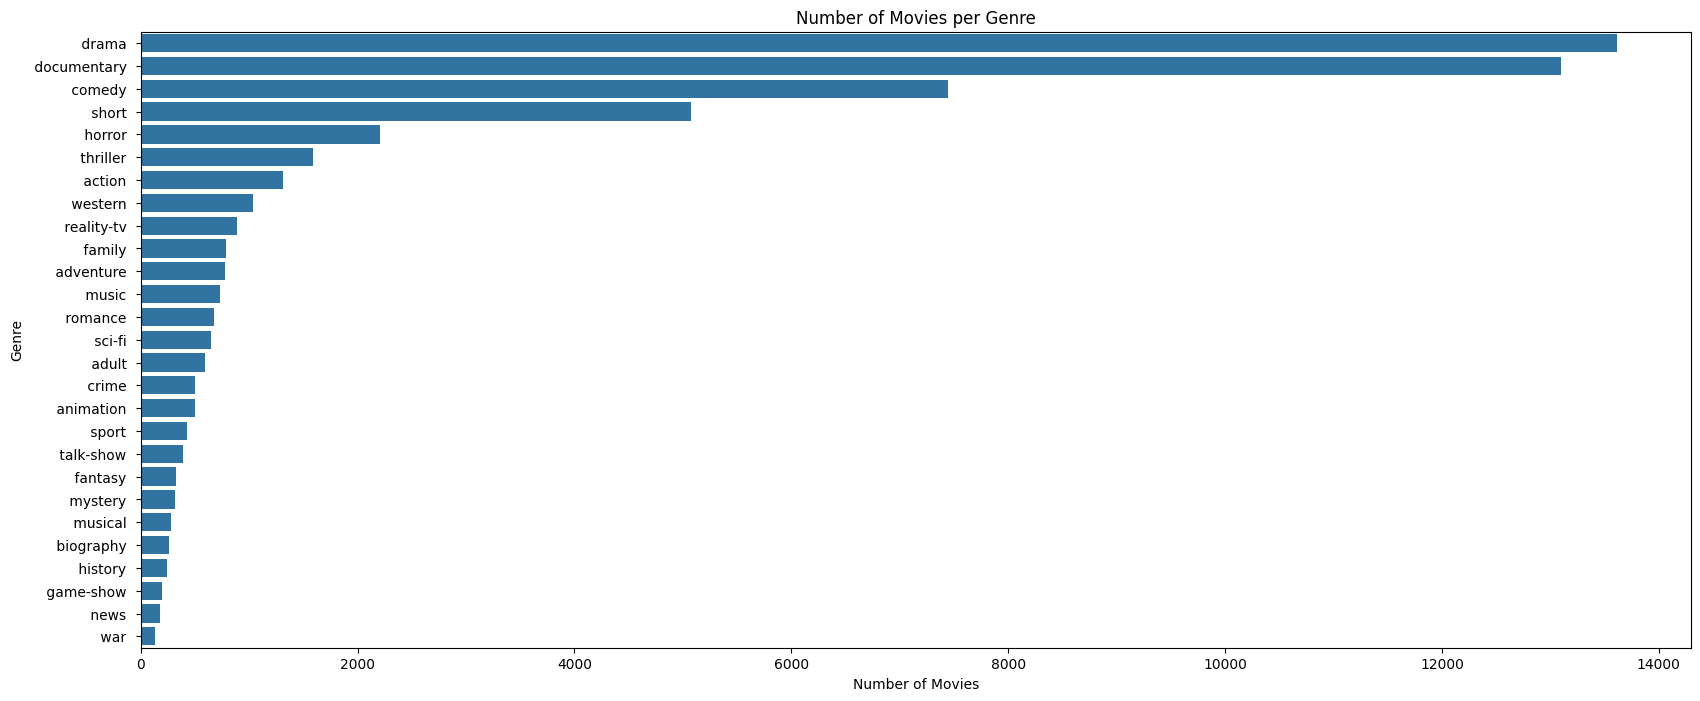

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(y=df['GENRE'], order = df['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

Bar Representation of Genre vs Description length

In [61]:
df1['DESCRIPTION_length'] = df1['DESCRIPTION'].apply(float)

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=df1)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
